In [1]:
!pip install xgboost
!pip install nltk

In [2]:
# 📦 Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 🔧 Model Selection & ML Algorithms
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# 🧮 Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 🧹 NLP Libraries
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# ⚠️ Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# 📥 Download stopwords (Kaggle-specific)
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load the datasets
fake = pd.read_csv("/kaggle/input/news-dataset/Fake.csv")
true = pd.read_csv("/kaggle/input/news-dataset/True.csv")

# Step 3: Add a label column to each dataset
fake['label'] = 0  # 0 for Fake News
true['label'] = 1  # 1 for Real News

# Step 4: Combine the datasets
df = pd.concat([fake, true], ignore_index=True)

# Step 5: Shuffle the combined dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 6: View the data
df.head()


,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


In [4]:
# Reading first 5 lines from Fake.csv
with open('/kaggle/input/news-dataset/Fake.csv', 'r', encoding='latin1') as f:
    print("📄 First 5 lines of Fake.csv:")
    for _ in range(5):
        print(f.readline())

print("\n")

# Reading first 5 lines from True.csv
with open('/kaggle/input/news-dataset/True.csv', 'r', encoding='latin1') as f:
    print("📄 First 5 lines of True.csv:")
    for _ in range(5):
        print(f.readline())


📄 First 5 lines of Fake.csv:
title,text,subject,date

 Donald Trump Sends Out Embarrassing New Yearâs Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What 

In [5]:
import pandas as pd

# Load the datasets from Kaggle's input directory
fake = pd.read_csv('/kaggle/input/news-dataset/Fake.csv', on_bad_lines='skip', encoding='latin1')
true = pd.read_csv('/kaggle/input/news-dataset/True.csv', on_bad_lines='skip', encoding='latin1')

# Check the shape to confirm successful loading
print("✅ Fake.csv shape:", fake.shape)
print("✅ True.csv shape:", true.shape)


✅ Fake.csv shape: (23481, 4)
✅ True.csv shape: (21417, 4)


In [6]:
# ✅ Add label column to each dataset
fake['label'] = 0  # Fake news
true['label'] = 1  # Real news

# ✅ Combine both datasets
df = pd.concat([fake, true], axis=0).reset_index(drop=True)

# ✅ Keep only 'text' and 'label' columns
df = df[['text', 'label']]

# ✅ Drop any missing values
df.dropna(inplace=True)

# ✅ Check class distribution
print("🧾 Class Distribution:\n", df['label'].value_counts())

# ✅ Preview the dataset
df.head()


🧾 Class Distribution:
 label
0    23481
1    21417
Name: count, dtype: int64


,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [7]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Download stopwords (only once per session)
nltk.download('stopwords')

# Initialize stemmer and stop words
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))

# Preprocessing function
def preprocess(text):
    # Lowercase
    text = text.lower()

    # Remove punctuation
    text = "".join([ch for ch in text if ch not in string.punctuation])

    # Tokenize, remove stopwords, and apply stemming
    tokens = text.split()
    processed = [stemmer.stem(word) for word in tokens if word not in stop_words]

    return " ".join(processed)

# Apply preprocessing to the 'text' column
df['text'] = df['text'].apply(preprocess)

# Preview the processed data
df.head()


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,label
0,donald trump wish american happi new year leav...,0
1,hous intellig committe chairman devin nune go ...,0
2,friday reveal former milwauke sheriff david cl...,0
3,christma day donald trump announc would back w...,0
4,pope franci use annual christma day messag reb...,0


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define features and labels
X = df['text']
y = df['label']

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the text data
X_vectorized = tfidf.fit_transform(X).toarray()

# Check shape of the resulting array
print("✅ TF-IDF shape:", X_vectorized.shape)


✅ TF-IDF shape: (44898, 5000)


In [9]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (stratify to maintain label balance)
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.25, random_state=42, stratify=y
)

# Confirm the shapes
print("✅ X_train shape:", X_train.shape)
print("✅ X_test shape:", X_test.shape)
print("✅ y_train distribution:\n", y_train.value_counts())


✅ X_train shape: (33673, 5000)
✅ X_test shape: (11225, 5000)
✅ y_train distribution:
 label
0    17610
1    16063
Name: count, dtype: int64


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define multiple ML models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Evaluation
    acc = accuracy_score(y_test, preds)
    print(f"✅ Accuracy: {acc:.4f}")
    
    print("📊 Confusion Matrix:")
    print(confusion_matrix(y_test, preds))
    
    print("📄 Classification Report:")
    print(classification_report(y_test, preds))
    print("-------------------------------------------------------------------------------------")
    


🔹 Training Logistic Regression...
✅ Accuracy: 0.9901
📊 Confusion Matrix:
[[5795   76]
 [  35 5319]]
📄 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5871
           1       0.99      0.99      0.99      5354

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

-------------------------------------------------------------------------------------

🔹 Training Decision Tree...
✅ Accuracy: 0.9964
📊 Confusion Matrix:
[[5857   14]
 [  26 5328]]
📄 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5871
           1       1.00      1.00      1.00      5354

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225

--------------

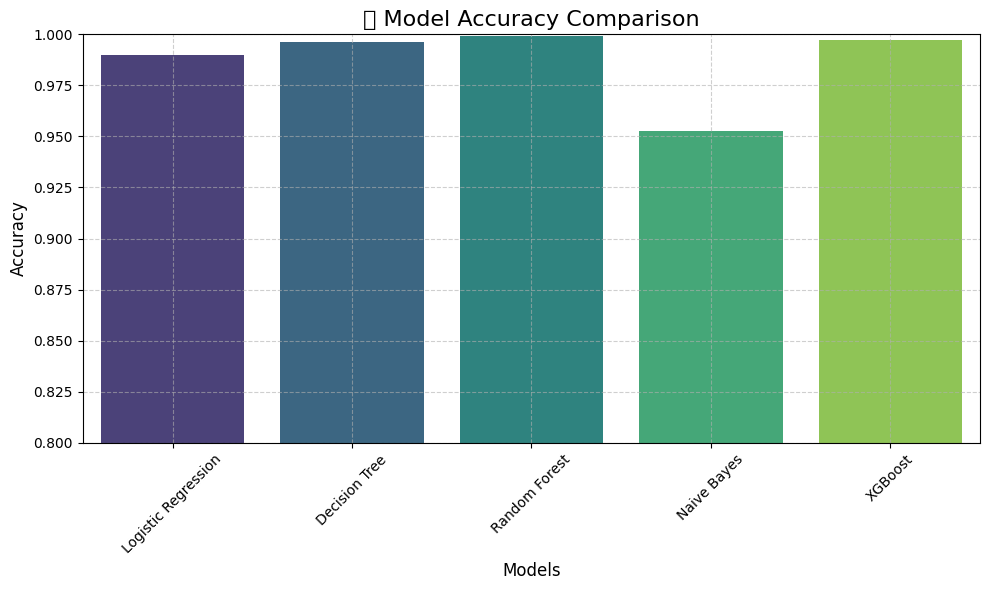

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Dictionary to store model accuracies
accuracies = {}

# Re-evaluate models on the test set
for name, model in models.items():
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies[name] = acc

# Plotting the accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')
plt.title("🔍 Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


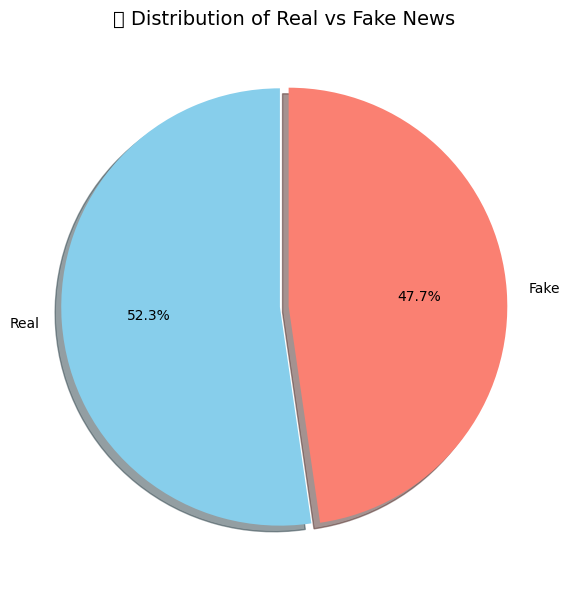

In [13]:
import matplotlib.pyplot as plt

# 🥧 Plot a pie chart for label distribution
plt.figure(figsize=(6, 6))
df['label'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['Real', 'Fake'],      # 1 → Real, 0 → Fake
    colors=['skyblue', 'salmon'],
    startangle=90,
    shadow=True,
    explode=(0.02, 0.02)
)
plt.title('📰 Distribution of Real vs Fake News', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()


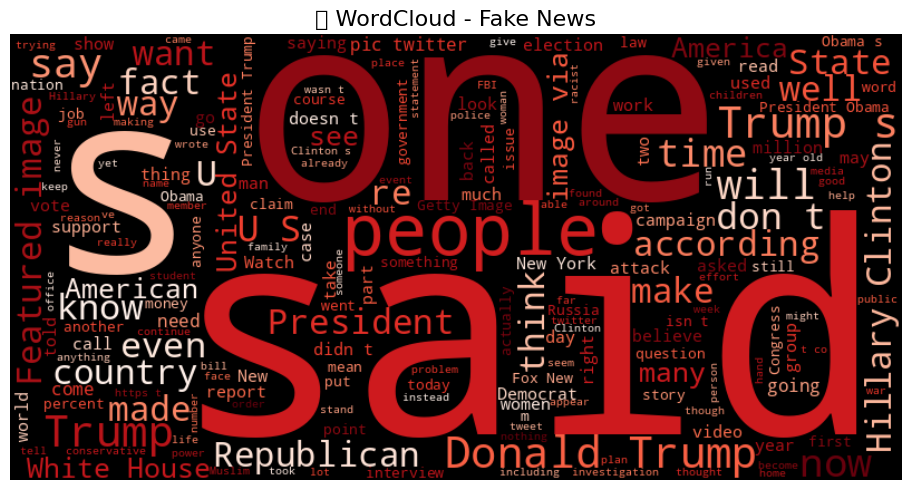

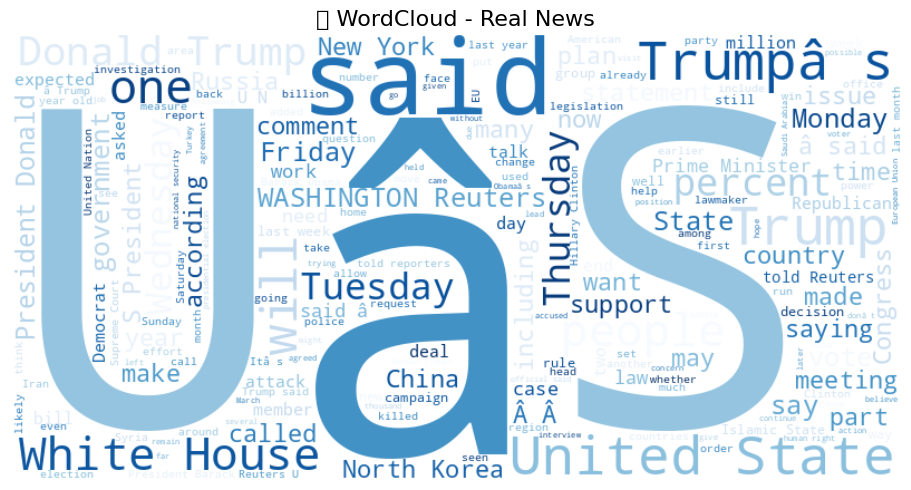

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 📌 WordCloud for Fake News
fake_text = " ".join(fake['text'].astype(str))

wordcloud_fake = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='Reds',
    max_words=200
).generate(fake_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title("🧠 WordCloud - Fake News", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

# 📌 WordCloud for Real News
true_text = " ".join(true['text'].astype(str))

wordcloud_true = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Blues',
    max_words=200
).generate(true_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.title("🧠 WordCloud - Real News", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


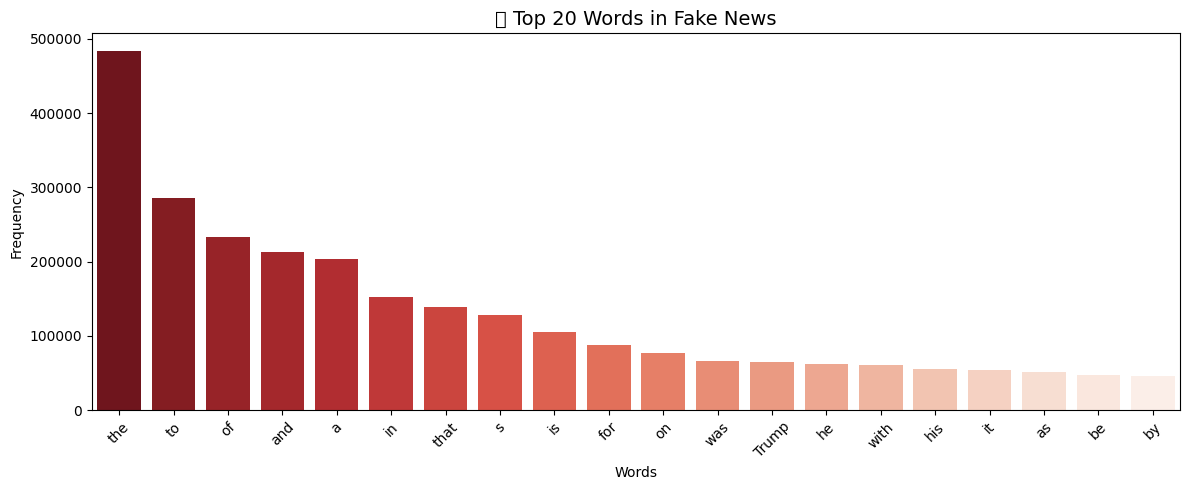

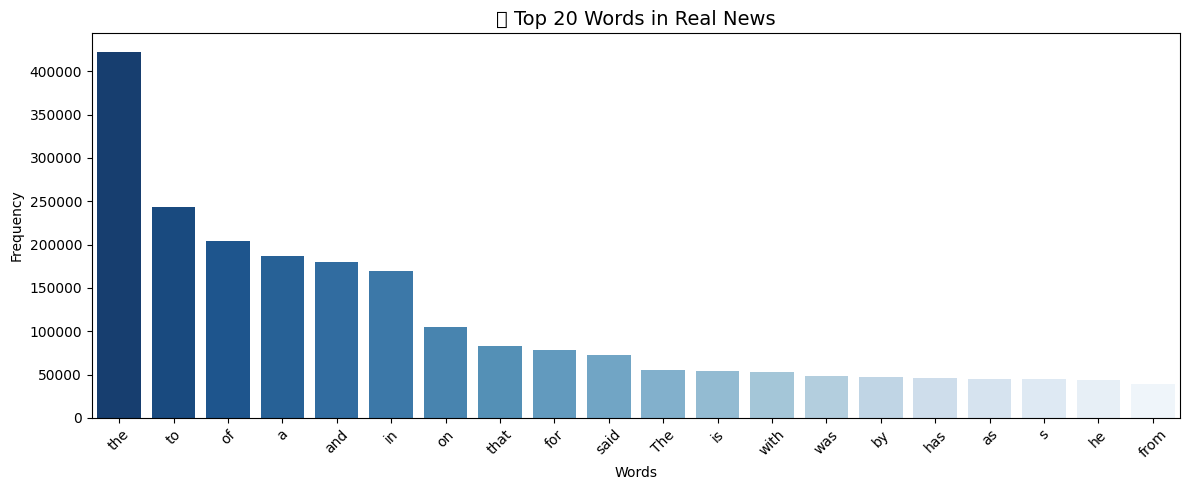

In [15]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# 🔍 Function to get top N common words
def get_top_n_words(texts, n=20):
    all_words = " ".join(texts).split()
    common_words = Counter(all_words).most_common(n)
    return zip(*common_words)  # returns two lists: words, counts

# 📊 Plot for Fake News
fake_words, fake_counts = get_top_n_words(fake['text'])

plt.figure(figsize=(12, 5))
sns.barplot(x=list(fake_words), y=list(fake_counts), palette='Reds_r')
plt.title("🔥 Top 20 Words in Fake News", fontsize=14)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📊 Plot for Real News
real_words, real_counts = get_top_n_words(true['text'])

plt.figure(figsize=(12, 5))
sns.barplot(x=list(real_words), y=list(real_counts), palette='Blues_r')
plt.title("📰 Top 20 Words in Real News", fontsize=14)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


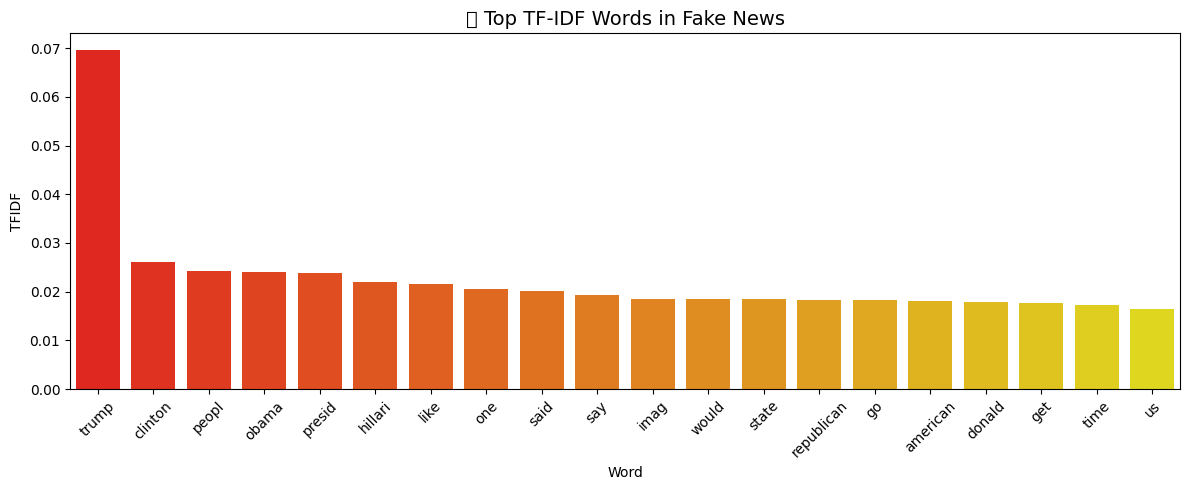

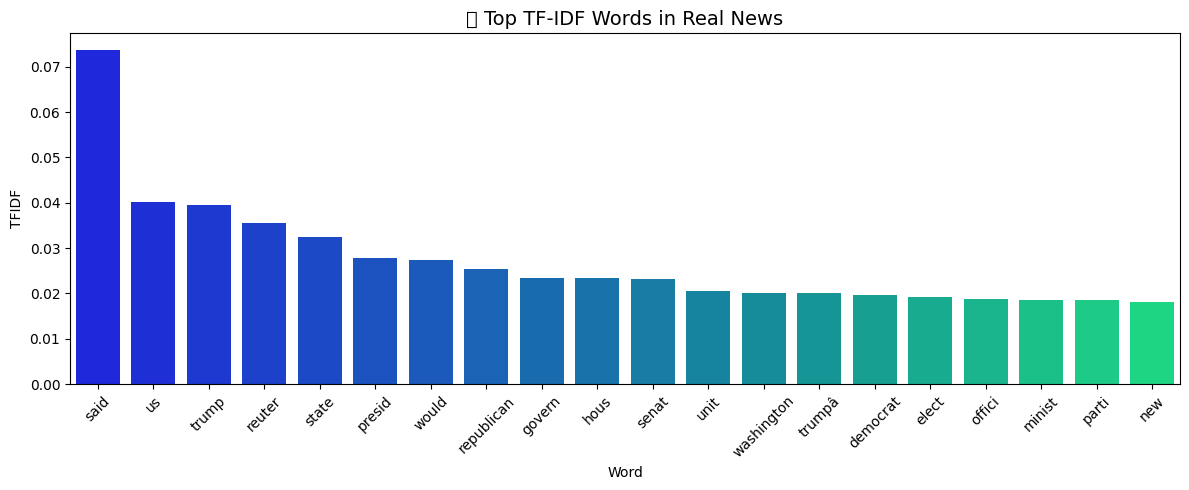

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📊 Function to get top TF-IDF features for a class
def top_tfidf_feats(class_id, top_n=20):
    # Mean TF-IDF score across all documents of the class
    class_tfidf_means = X_vectorized[y == class_id].mean(axis=0)
    class_tfidf_means = np.squeeze(np.asarray(class_tfidf_means))
    
    # Get indices of top features
    top_indices = class_tfidf_means.argsort()[::-1][:top_n]
    
    # Map indices to feature names and values
    top_words = [tfidf.get_feature_names_out()[i] for i in top_indices]
    top_scores = [class_tfidf_means[i] for i in top_indices]
    
    return pd.DataFrame({'Word': top_words, 'TFIDF': top_scores})

# 🔍 Top TF-IDF Words in Fake News
top_fake = top_tfidf_feats(class_id=0)

plt.figure(figsize=(12, 5))
sns.barplot(x='Word', y='TFIDF', data=top_fake, palette='autumn')
plt.title('🔥 Top TF-IDF Words in Fake News', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 🔍 Top TF-IDF Words in Real News
top_real = top_tfidf_feats(class_id=1)

plt.figure(figsize=(12, 5))
sns.barplot(x='Word', y='TFIDF', data=top_real, palette='winter')
plt.title('📰 Top TF-IDF Words in Real News', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
from sklearn.metrics import accuracy_score

# Dictionary to store accuracy scores
accuracies = {}

# Evaluate each model and store its accuracy
for name, model in models.items():
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# Find the best model
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]

print(f"\n🏆 Best Model Based on Accuracy: {best_model_name}")
print(f"✅ Accuracy: {accuracies[best_model_name]:.4f}")


Logistic Regression Accuracy: 0.9901
Decision Tree Accuracy: 0.9964
Random Forest Accuracy: 0.9990
Naive Bayes Accuracy: 0.9528
XGBoost Accuracy: 0.9971

🏆 Best Model Based on Accuracy: Random Forest
✅ Accuracy: 0.9990


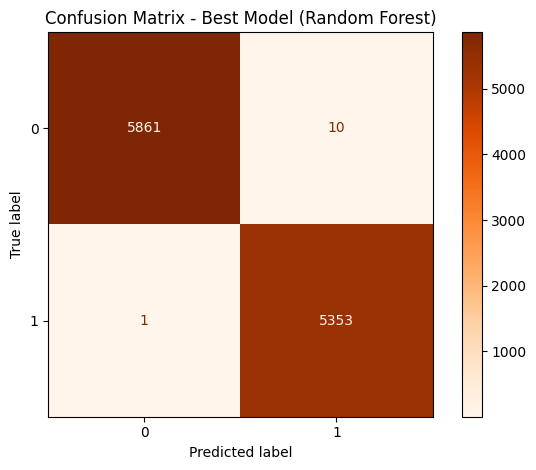

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ✅ Display confusion matrix for the best model
ConfusionMatrixDisplay.from_estimator(
    best_model,        # Automatically selected best model
    X_test,            # Test features
    y_test,            # True labels
    cmap='Oranges',    # Color map
    values_format='d'  # Integer formatting for counts
)

plt.title(f"Confusion Matrix - Best Model ({best_model_name})")
plt.tight_layout()
plt.show()



In [24]:
import pickle

# Save all baseline trained models
for name, model in models.items():
    filename = f"{name.replace(' ', '_').lower()}_model.pkl"
    with open(filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"✅ Saved: {filename}")

# Save the best model separately
best_model_filename = f"best_model_{best_model_name.replace(' ', '_').lower()}.pkl"
with open(best_model_filename, 'wb') as f:
    pickle.dump(best_model, f)
    print(f"✅ Saved Best Model: {best_model_filename}")

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)
    print("✅ Saved: tfidf_vectorizer.pkl")


✅ Saved: logistic_regression_model.pkl
✅ Saved: decision_tree_model.pkl
✅ Saved: random_forest_model.pkl
✅ Saved: naive_bayes_model.pkl
✅ Saved: xgboost_model.pkl
✅ Saved Best Model: best_model_random_forest.pkl
✅ Saved: tfidf_vectorizer.pkl


In [26]:
import pickle
import zipfile
import os

# Directory to store model files
model_dir = "saved_models"
os.makedirs(model_dir, exist_ok=True)

# Save all baseline trained models
for name, model in models.items():
    filename = f"{name.replace(' ', '_').lower()}_model.pkl"
    filepath = os.path.join(model_dir, filename)
    with open(filepath, 'wb') as f:
        pickle.dump(model, f)
    print(f"✅ Saved: {filepath}")

# Save the best model separately (based on accuracy)
best_model_filename = f"best_model_{best_model_name.replace(' ', '_').lower()}.pkl"
best_model_path = os.path.join(model_dir, best_model_filename)
with open(best_model_path, 'wb') as f:
    pickle.dump(best_model, f)
print(f"✅ Saved Best Model: {best_model_path}")

# Save TF-IDF Vectorizer
vectorizer_path = os.path.join(model_dir, 'tfidf_vectorizer.pkl')
with open(vectorizer_path, 'wb') as f:
    pickle.dump(tfidf, f)
print("✅ Saved: tfidf_vectorizer.pkl")

# Create a ZIP file containing all models
zip_filename = "models_bundle.zip"
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for root, dirs, files in os.walk(model_dir):
        for file in files:
            zipf.write(os.path.join(root, file), arcname=file)

print(f"\n📦 All models zipped into: {zip_filename}")


✅ Saved: saved_models/logistic_regression_model.pkl
✅ Saved: saved_models/decision_tree_model.pkl
✅ Saved: saved_models/random_forest_model.pkl
✅ Saved: saved_models/naive_bayes_model.pkl
✅ Saved: saved_models/xgboost_model.pkl
✅ Saved Best Model: saved_models/best_model_random_forest.pkl
✅ Saved: tfidf_vectorizer.pkl

📦 All models zipped into: models_bundle.zip
